# intro to regression with neural networks in tensorflow

In [175]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

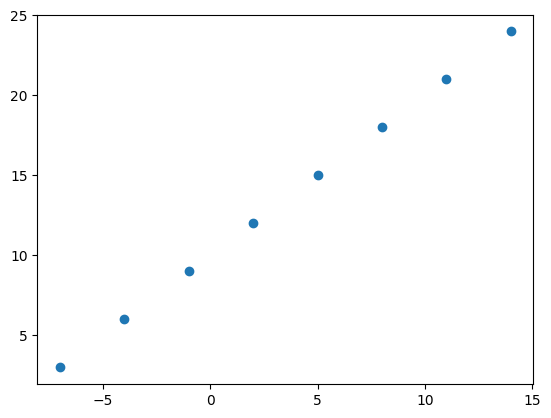

In [25]:
X = np.array([-7.0, -4., -1., 2., 5., 8., 11., 14.])
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])
plt.scatter(X, y)


In [26]:
# this is the regression we wont our model to achieve
y == X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

In [27]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [28]:
X = tf.constant(X)
y = tf.constant(y)
X, y


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [29]:
tf.random.set_seed(42)

# 1. create a model using the sequential api
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 291ms/step - loss: 17.4504 - mae: 17.4504
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 17.1692 - mae: 17.1692
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 16.8879 - mae: 16.8879
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 16.6067 - mae: 16.6067
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 16.3254 - mae: 16.3254


In [30]:
# try to make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 60ms/step


array([[-10.720408]], dtype=float32)

In [31]:
# improving model
# rebuilding it
tf.random.set_seed(42)
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 290ms/step - loss: 14.4089 - mae: 14.4089
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 14.2764 - mae: 14.2764
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 14.1439 - mae: 14.1439
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 14.0114 - mae: 14.0114
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 13.8789 - mae: 13.8789
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 13.7464 - mae: 13.7464
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 13.6139 - mae: 13.6139
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 13.4814 - mae: 13.4814
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3489 - mae: 13.3489
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 13.2164 - mae: 13.2164
Epoch 11/100
1/1 [==============================] - 0s 9

In [32]:
# prediction
model.predict([17.0])

1/1 [==============================] - 0s 61ms/step


array([[29.795383]], dtype=float32)

In [33]:
# making model with 100 hidden layers
tf.random.set_seed(42)
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(50, activation=None),
     tf.keras.layers.Dense(1)])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 471ms/step - loss: 15.4693 - mae: 15.4693
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 15.3669 - mae: 15.3669
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 15.2646 - mae: 15.2646
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 15.1623 - mae: 15.1623
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 15.0601 - mae: 15.0601
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 14.9579 - mae: 14.9579
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 14.8718 - mae: 14.8718
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 14.7998 - mae: 14.7998
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 14.7289 - mae: 14.7289
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 14.6587 - mae: 14.6587
Epoch 11/100
1/1 [==============================] - 0s 

In [34]:
model.predict([17.0])

1/1 [==============================] - 0s 69ms/step


array([[23.538202]], dtype=float32)

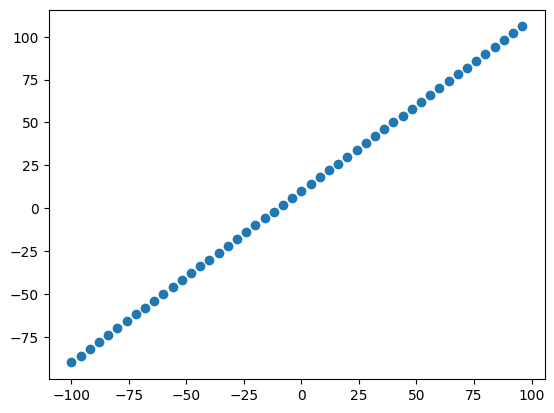

In [35]:
X = tf.range(-100, 100, 4)
y = X + 10
plt.scatter(X, y)


In [36]:
# splitting into 3 sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

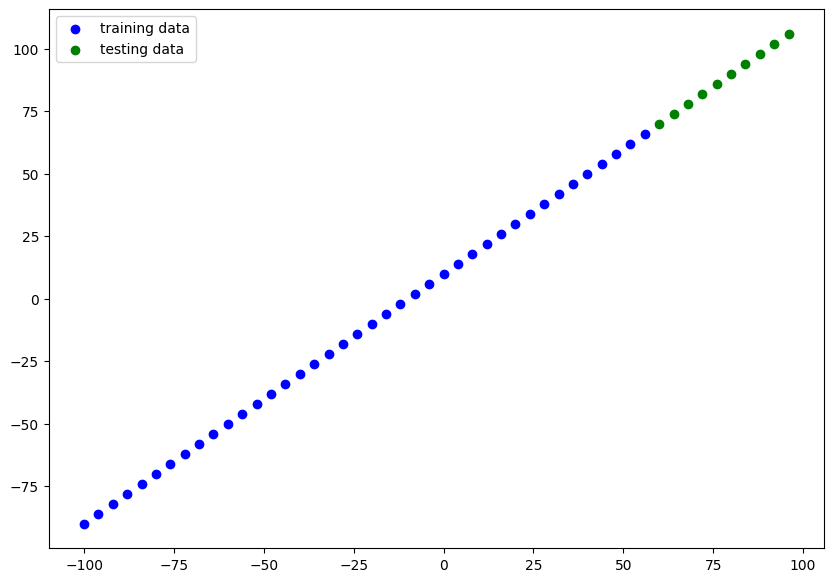

In [37]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="training data")
plt.scatter(X_test, y_test, c="g", label="testing data")
plt.legend()

In [43]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
],
                            name="test")

model.compile(loss="mae", optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

model.summary()
model.fit(X_train, y_train, epochs=100)


Model: "test"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 40.2156 - mae: 40.2156
Epoch 2/100
2/2 [==============================] - 0s 50ms/step - loss: 30.9713 - mae: 30.9713
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 36.2949 - mae: 36.2949
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 26.1849 - mae: 26.1849
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.3794 - mae

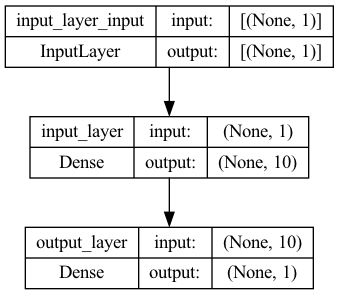

In [44]:
plot_model(model=model, show_shapes=True)


### Visualizing models predictions

In [45]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 110ms/step


array([[ 76.27076 ],
       [ 81.24046 ],
       [ 86.210175],
       [ 91.17987 ],
       [ 96.14958 ],
       [101.11928 ],
       [106.08899 ],
       [111.05869 ],
       [116.02839 ],
       [120.99809 ]], dtype=float32)

In [46]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", label="training data")
    plt.scatter(test_data, test_labels, c="g", label="testing data")
    plt.scatter(test_data, predictions, c="r", label="predictions")
    plt.legend()


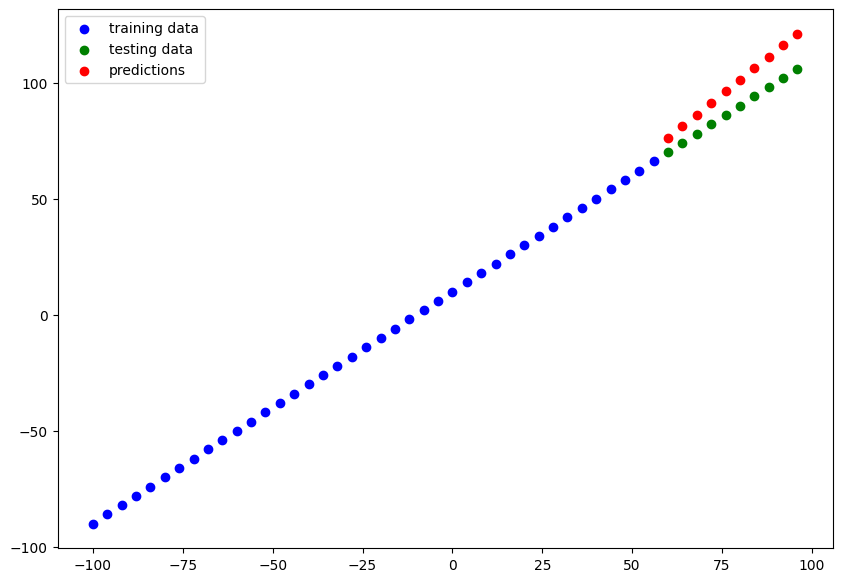

In [47]:
plot_predictions()

### eval models predictions with regression metrixs

In [50]:
# eval model on test set
model.evaluate(X_test, y_test)
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

1/1 [==============================] - 0s 46ms/step - loss: 10.6344 - mae: 10.6344


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.437544, 11.103815, 10.      , 10.235974, 11.659833, 14.271566,
       18.08899 , 23.058693, 28.028387, 32.998093], dtype=float32)>

In [57]:
y_pred.shape
# the shapes are diff so you need to squeeze y_pred

(10, 1)

In [56]:
tf.squeeze(y_pred).shape, y_test.shape

(TensorShape([10]), TensorShape([10]))

In [59]:
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.634429>

In [61]:
# calculate the mean square error
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse


<tf.Tensor: shape=(), dtype=float32, numpy=120.84878>

In [81]:
# make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))


def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))


## model 1 with 1 layer and 100 epochs

In [97]:
tf.random.set_seed(42)
model1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model1.compile(loss="mae",
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

model1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 61.2451 - mae: 61.2451
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 26.4239 - mae: 26.4239
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 10.4998 - mae: 10.4998
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 12.9883 - mae: 12.9883
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 12.0355 - mae: 12.0355
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 9.3143 - mae: 9.3143
Epoch 7/100
2/2 [==============================] - 0s 23ms/step - loss: 8.4755 - mae: 8.4755
Epoch 8/100
2/2 [==============================] - 0s 22ms/step - loss: 9.0508 - mae: 9.0508
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 18.4854 - mae: 18.4854
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 9.9771 - mae: 9.9771
Epoch 11/100
2/2 [==============================] - 0s 15ms/st

1/1 [==============================] - 0s 71ms/step


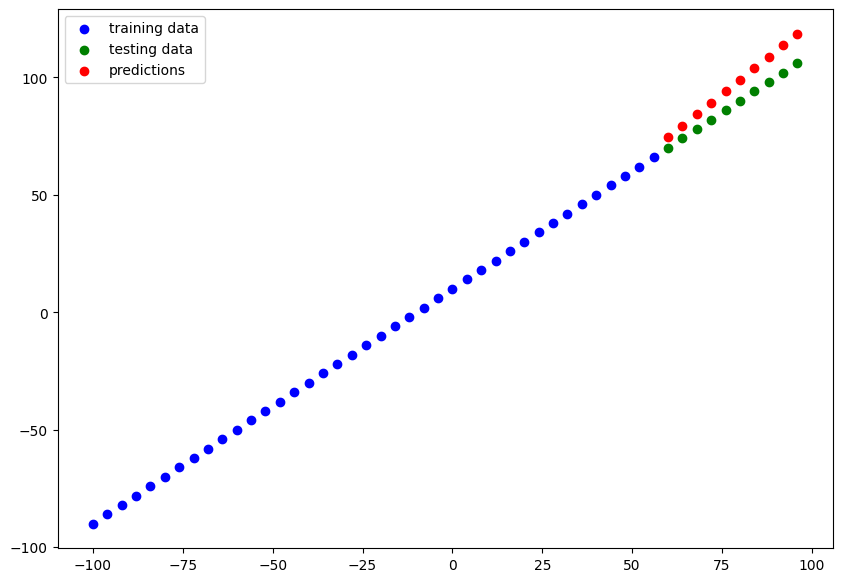

In [78]:
y_preds1 = model1.predict(X_test)
plot_predictions(predictions=y_preds1)

In [84]:
mae1 = mae(y_test, y_preds1)
mse1 = mse(y_test, y_preds1)
mae1, mse1


(<tf.Tensor: shape=(), dtype=float32, numpy=8.5499325>,
 <tf.Tensor: shape=(), dtype=float32, numpy=79.58211>)

## model 2 with 2 layers and 100 epochs

In [91]:
tf.random.set_seed(42)
model2 = tf.keras.Sequential(
    [tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)])

model2.compile(loss="mae",
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

model2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 26.3953 - mae: 26.3953
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.7239 - mae: 24.7239
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 28.9990 - mae: 28.9990
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 13.7529 - mae: 13.7529
Epoch 5/100
2/2 [==============================] - 0s 35ms/step - loss: 18.6454 - mae: 18.6454
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3839 - mae: 9.3839
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 10.3585 - mae: 10.3585
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 11.2489 - mae: 11.2489
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 42.3372 - mae: 42.3372
Epoch 10/100
2/2 [==============================] - 0s 13ms/step - loss: 29.4906 - mae: 29.4906
Epoch 11/100
2/2 [==============================] - 0s 8

1/1 [==============================] - 0s 73ms/step


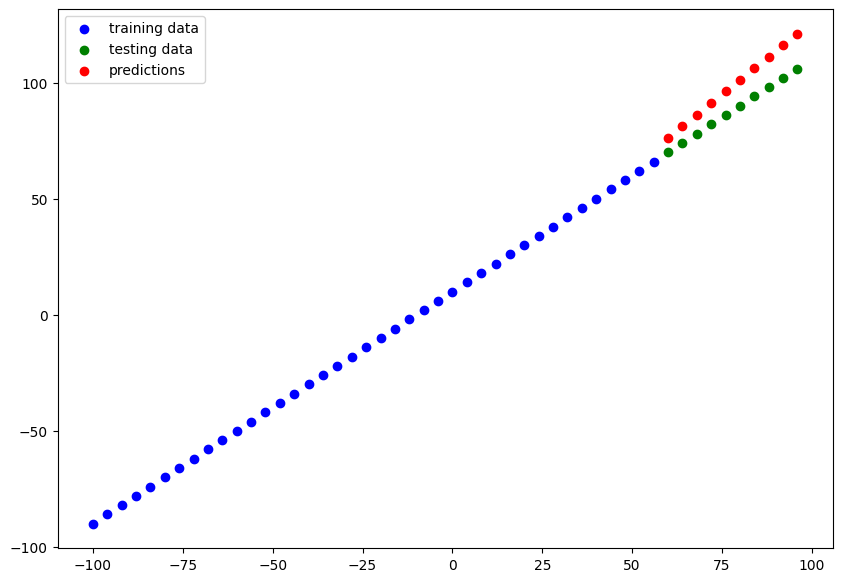

In [92]:
y_preds2 = model2.predict(X_test)
plot_predictions(predictions=y_preds2)

In [93]:
mae2 = mae(y_test, y_preds2)
mse2 = mse(y_test, y_preds2)
mae2, mse2


(<tf.Tensor: shape=(), dtype=float32, numpy=10.639637>,
 <tf.Tensor: shape=(), dtype=float32, numpy=120.96377>)

## model 3 with 2 layers and 500 epochs

In [96]:
tf.random.set_seed(42)
model3 = tf.keras.Sequential(
    [tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)])

model3.compile(loss="mae",
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

model3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500)


Epoch 1/500
2/2 [==============================] - 1s 6ms/step - loss: 23.6048 - mae: 23.6048
Epoch 2/500
2/2 [==============================] - 0s 12ms/step - loss: 25.8738 - mae: 25.8738
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 30.4195 - mae: 30.4195
Epoch 4/500
2/2 [==============================] - 0s 15ms/step - loss: 15.2802 - mae: 15.2802
Epoch 5/500
2/2 [==============================] - 0s 15ms/step - loss: 21.6484 - mae: 21.6484
Epoch 6/500
2/2 [==============================] - 0s 15ms/step - loss: 12.4770 - mae: 12.4770
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.8053 - mae: 11.8053
Epoch 8/500
2/2 [==============================] - 0s 20ms/step - loss: 12.9761 - mae: 12.9761
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 34.2501 - mae: 34.2501
Epoch 10/500
2/2 [==============================] - 0s 18ms/step - loss: 23.6813 - mae: 23.6813
Epoch 11/500
2/2 [==============================] - 

1/1 [==============================] - 0s 50ms/step


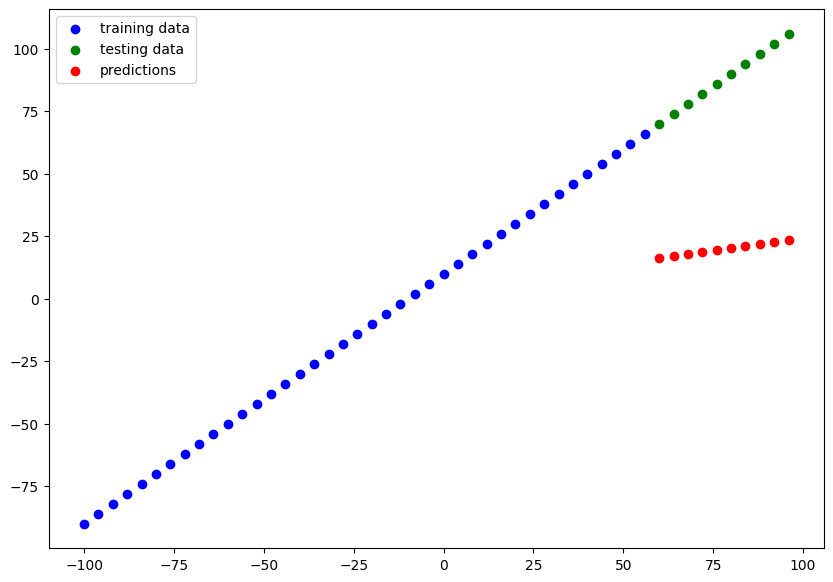

In [98]:
y_preds3 = model3.predict(X_test)
plot_predictions(predictions=y_preds3)

In [99]:
mae3 = mae(y_test, y_preds3)
mse3 = mse(y_test, y_preds3)
mae3, mse3


(<tf.Tensor: shape=(), dtype=float32, numpy=67.953896>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4702.118>)

### comparing models

In [106]:
model_results = [["model1", mae1.numpy(), mse1.numpy()],
                 ["model2", mae2.numpy(), mse2.numpy()],
                 ["model3", mae3.numpy(), mse3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results


,model,mae,mse
0,model1,8.549932,79.582108
1,model2,10.639637,120.963768
2,model3,67.953896,4702.118164


In [107]:
model2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                20        
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### saving models
2 formats
- SavedModel format
- HDF5 format

In [109]:
model2.save("saved_model_format")
model2.save("saved_model_format.h5")

INFO:tensorflow:Assets written to: saved_model_format/assets


INFO:tensorflow:Assets written to: saved_model_format/assets


In [112]:
loaded_model = tf.keras.models.load_model("saved_model_format")
loaded_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                20        
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [113]:
loaded_h5 = tf.keras.models.load_model("saved_model_format.h5")
loaded_h5.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                20        
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Larger example
insurance medical costs

In [183]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [184]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [121]:
insurance_onehot = pd.get_dummies(insurance)
insurance_onehot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [125]:
X = insurance_onehot.drop("charges", axis=1)
y = insurance_onehot.charges

spliting data using sklearn

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [153]:
tf.random.set_seed(42)
model_insurance = tf.keras.Sequential(
    [tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)])

model_insurance.compile(loss="mae",
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

model_insurance.fit(np.array(X_train), np.array(y_train), epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8683.8877 - mae: 8683.8877
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7862.2178 - mae: 7862.2178
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7536.2354 - mae: 7536.2354
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7731.3374 - mae: 7731.3374
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7667.8818 - mae: 7667.8818
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7602.5630 - mae: 7602.5630
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7523.9937 - mae: 7523.9937
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7705.9370 - mae: 7705.9370
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7620.6484 - mae: 7620.6484
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7758.1440 - mae: 7758.1440

In [155]:
model_insurance.evaluate(np.array(X_test),np.array(y_test))

9/9 [==============================] - 0s 2ms/step - loss: 7239.5698 - mae: 7239.5698


[7239.56982421875, 7239.56982421875]

In [161]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364485)

In [164]:
tf.random.set_seed(42)
model_insurance2 = tf.keras.Sequential(
    [tf.keras.layers.Dense(100), tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)])

model_insurance2.compile(loss="mae",
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

model_insurance2.fit(np.array(X_train), np.array(y_train), epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13297.7939 - mae: 13297.7939
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13142.1406 - mae: 13142.1406
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12819.8516 - mae: 12819.8516
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12182.5195 - mae: 12182.5195
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 11092.6387 - mae: 11092.6387
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9657.9209 - mae: 9657.9209
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8297.4854 - mae: 8297.4854
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7578.0127 - mae: 7578.0127
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7443.3784 - mae: 7443.3784
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7421.4683 - mae:

In [166]:
model_insurance2.evaluate(np.array(X_test),np.array(y_test))

9/9 [==============================] - 0s 5ms/step - loss: 4893.1973 - mae: 4893.1973


[4893.197265625, 4893.197265625]

In [169]:
tf.random.set_seed(42)
model_insurance3 = tf.keras.Sequential(
    [tf.keras.layers.Dense(100), tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)])

model_insurance3.compile(loss="mae",
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

history = model_insurance3.fit(np.array(X_train), np.array(y_train), epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 13305.7188 - mae: 13305.7188
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13125.7881 - mae: 13125.7881
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 12759.0107 - mae: 12759.0107
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 12045.1621 - mae: 12045.1621
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 10862.5215 - mae: 10862.5215
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 9387.4238 - mae: 9387.4238
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 8085.3291 - mae: 8085.3291
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 7516.1948 - mae: 7516.1948
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 7430.8667 - mae: 7430.8667
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7410.6577 - mae:

In [168]:
model_insurance3.evaluate(np.array(X_test),np.array(y_test))

9/9 [==============================] - 0s 5ms/step - loss: 3169.9556 - mae: 3169.9556


[3169.95556640625, 3169.95556640625]

Text(0.5, 0, 'epochs')

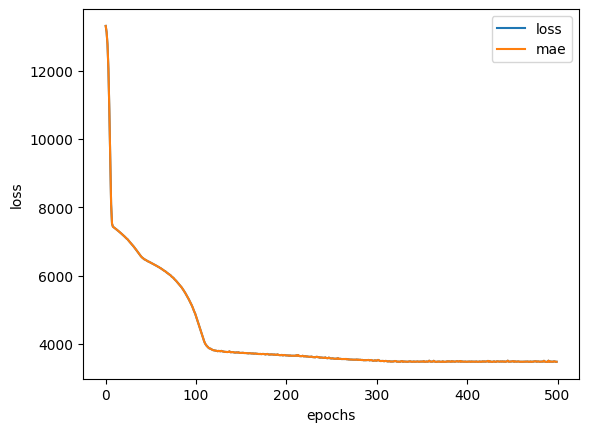

In [174]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## normalizing data

In [186]:
# turn all values in these columns into 0's and 1's
ct = make_column_transformer((MinMaxScaler(), ["age", "bmi", "children"]),
                             (OneHotEncoder(handle_unknown="ignore"),
                             ["sex", "smoker", "region"]))

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# fit column transformer to our training data
ct.fit(X_train)

# transform training and test data with normalization (minmaxscaler) and onehotencoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [191]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [192]:
tf.random.set_seed(42)
model_insurance4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_insurance4.compile(loss="mae",
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

model_insurance4.fit(X_train_normal,
                               np.array(y_train),
                               epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 9ms/step - loss: 13343.5977 - mae: 13343.5977
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13334.2285 - mae: 13334.2285
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 13311.2939 - mae: 13311.2939
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13264.3027 - mae: 13264.3027
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13182.4062 - mae: 13182.4062
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 13054.8916 - mae: 13054.8916
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12871.2549 - mae: 12871.2549
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 12621.1123 - mae: 12621.1123
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12294.3193 - mae: 12294.3193
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11888.01

In [194]:
model_insurance4.evaluate(X_test_normal,np.array(y_test))

9/9 [==============================] - 0s 3ms/step - loss: 3437.8799 - mae: 3437.8799


[3437.8798828125, 3437.8798828125]

still not that comfortable with normalization. need to look into that a bit more